In [1]:
%run -m celldom.nb.logging
import os
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from celldom.core import cytometry
from celldom.config import experiment_config
from celldom.extract import ALL_IMAGES
import celldom
plt.gray()
None

In [2]:
config = experiment_config.ExperimentConfig(celldom.get_config('experiment', 'exp-20181013-G1v2-K562-imatinib'))

In [3]:
config.parse_path('data/2018-10-13-G1-K562-Orange-1-Imatinib-150nM-0hr/BFF_16X_St_001_Apt_000_201810131830.tif')

{'apartment': '000',
 'cell_line': 'K562',
 'color': 'Orange',
 'concentration': '150nM',
 'condition': '1',
 'datetime': Timestamp('2018-10-13 18:30:00'),
 'drug': 'Imatinib',
 'hour': '0',
 'street': '001'}

In [4]:
img_path = '2018-10-13-G1-K562-Orange-2-Imatinib-150nM-24hr/BFF_16X_St_048_Apt_008_201810141311.tif'
img_path = osp.join(celldom.get_data_dir(), 'dataset', 'dataset08', img_path)
img_path

'/lab/data/celldom/dataset/dataset08/2018-10-13-G1-K562-Orange-2-Imatinib-150nM-24hr/BFF_16X_St_048_Apt_008_201810141311.tif'

In [5]:
acq = cytometry.Acquisition(config, img_path)
img = acq.load_image()
img.dtype, img.shape

(dtype('uint8'), (750, 1000, 3))

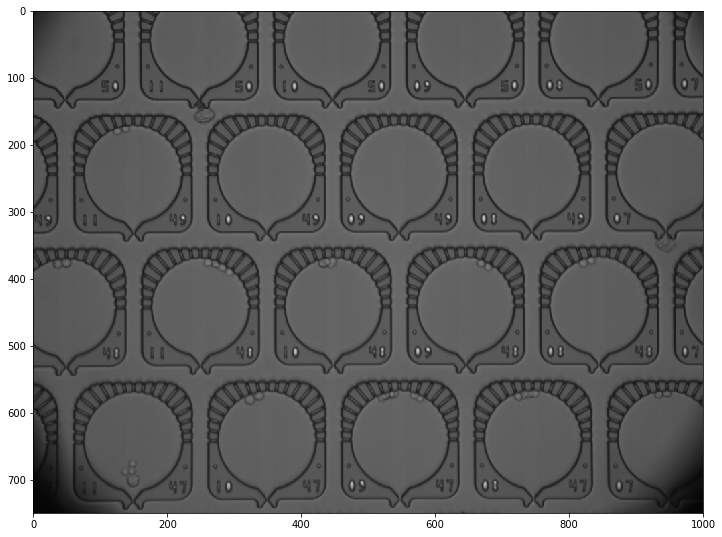

In [6]:
plt.imshow(img)
plt.gcf().set_size_inches(12, 12)

In [7]:
output_dir = '/tmp/cytometry_debug'
if osp.exists(output_dir):
    !rm -rf /tmp/cytometry_debug/*
cytometer = cytometry.Cytometer(config, output_dir)
cytometer.initialize()

Using TensorFlow backend.


In [8]:
%%time
acq_data, apt_data, cell_data = cytometer.analyze(acq, dpf=ALL_IMAGES)

CPU times: user 6.96 s, sys: 5.27 s, total: 12.2 s
Wall time: 6.46 s


In [9]:
apt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 29 columns):
acq_apartment           12 non-null object
acq_cell_line           12 non-null object
acq_color               12 non-null object
acq_concentration       12 non-null object
acq_condition           12 non-null object
acq_datetime            12 non-null datetime64[ns]
acq_drug                12 non-null object
acq_hour                12 non-null object
acq_id                  12 non-null object
acq_processed_at        12 non-null datetime64[ns]
acq_street              12 non-null object
apt_id                  12 non-null int64
apt_image               12 non-null object
apt_image_height        12 non-null int64
apt_image_width         12 non-null int64
apt_num                 12 non-null object
apt_num_digit_images    12 non-null object
apt_num_digit_scores    12 non-null object
apt_num_image           12 non-null object
cell_count              12 non-null int64
focus_score             1

In [10]:
apt_data[['apt_num','st_num','cell_count']]

,apt_num,st_num,cell_count
0,49,08,0
1,49,10,0
2,49,09,0
3,49,11,2
4,48,10,2
5,48,09,2
6,48,08,2
7,48,11,4
8,47,10,2
9,47,09,5


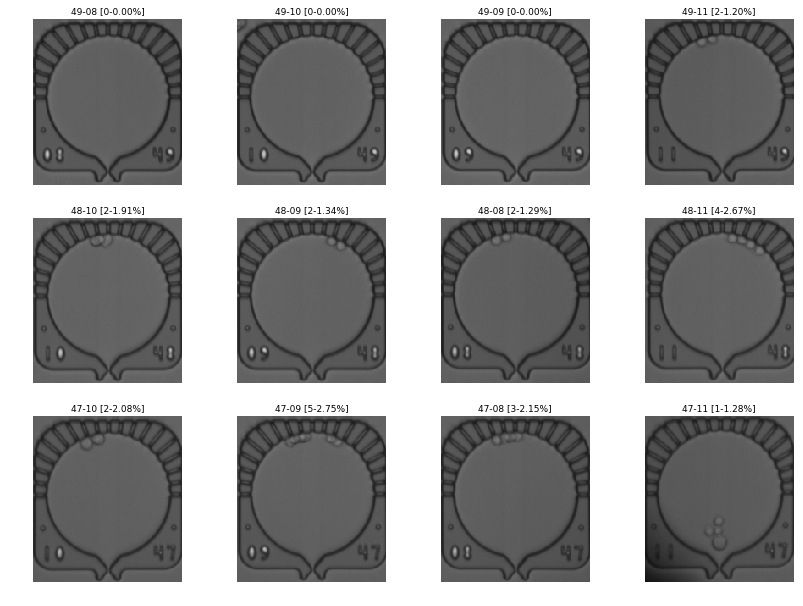

In [12]:
from cvutils.visualize import display_images
display_images(apt_data['apt_image'], titles=[
    '{}-{} [{}-{:.2%}]'.format(r['apt_num'], r['st_num'], r['cell_count'], r['occupancy_chamber']) for _, r in apt_data.iterrows()
])

In [ ]:
from cvutils.visualize import display_images
num_images = [
    (r['apt_num_digit_images'] + r['st_num_digit_images'], '{}{}'.format(r['apt_num'], r['st_num']))
    for _, r in apt_data.sample(n=min(5, len(apt_data))).iterrows()
]
display_images(
    [img for e in num_images for img in e[0]], 
    titles=[digit for e in num_images for digit in e[1]]
)

In [13]:
cell_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 0 to 0
Data columns (total 28 columns):
acq_apartment        23 non-null object
acq_cell_line        23 non-null object
acq_color            23 non-null object
acq_concentration    23 non-null object
acq_condition        23 non-null object
acq_datetime         23 non-null datetime64[ns]
acq_drug             23 non-null object
acq_hour             23 non-null object
acq_id               23 non-null object
acq_processed_at     23 non-null datetime64[ns]
acq_street           23 non-null object
apt_id               23 non-null int64
apt_num              23 non-null object
area                 23 non-null int64
cell_id              23 non-null int64
cell_image           23 non-null object
centroid_x           23 non-null float64
centroid_y           23 non-null float64
eccentricity         23 non-null float64
in_chamber           23 non-null bool
in_trap              23 non-null bool
roi_xmax             23 non-null int64
roi_xmi

In [14]:
cell_data.groupby(['in_chamber', 'in_trap']).size()

in_chamber  in_trap
True        False      23
dtype: int64